In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pandas as pd
import glob
import numpy as np
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense

In [ ]:
!pip install kaggle

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d sanidhyak/human-face-emotions

 99% 80.0M/80.5M [00:03<00:00, 32.5MB/s]
100% 80.5M/80.5M [00:03<00:00, 25.2MB/s]


In [ ]:
!unzip human-face-emotions.zip

In [6]:
folder_path = '/content/data/Angry'

In [7]:
image_files = glob.glob(folder_path + '/*.jpg')

In [8]:
imagenes = []
etiquetas = []
for x in image_files:
  image = Image.open(x)
  #arreglo = np.array(image)
  imagenes.append(image)
  etiquetas.append(0)


In [9]:
folder_path = '/content/data/Happy'
image_files = glob.glob(folder_path + '/*.jpg')

In [10]:
for x in image_files:
  image = Image.open(x)
  #arreglo = np.array(image)
  imagenes.append(image)
  etiquetas.append(1)

In [ ]:
plt.imshow(imagenes[-1])

In [11]:
folder_path = '/content/data/Sad'
image_files = glob.glob(folder_path + '/*.jpg')

In [12]:
for x in image_files:
  image = Image.open(x)
  #arreglo = np.array(image)
  imagenes.append(image)
  etiquetas.append(2)

In [ ]:
imagenes

In [ ]:
len(etiquetas)

In [ ]:
len(imagenes)

Dimensiones de la imagen con menor pixelaje:
Ancho: 259 píxeles
Alto: 194 píxeles


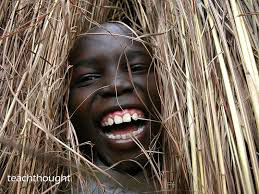

In [14]:
from PIL import Image

def calcular_pixelaje(imagen):
    return imagen.size[0] * imagen.size[1]

# Inicializamos la variable para almacenar la imagen con menor pixelaje
imagen_menor_pixelaje = None
menor_pixelaje = float('inf')

for imagen in imagenes:
    pixelaje_actual = calcular_pixelaje(imagen)
    if pixelaje_actual < menor_pixelaje:
        imagen_menor_pixelaje = imagen
        menor_pixelaje = pixelaje_actual

# Visualizamos la imagen con menor pixelaje y sus dimensiones
if imagen_menor_pixelaje:
    print("Dimensiones de la imagen con menor pixelaje:")
    print(f"Ancho: {imagen_menor_pixelaje.size[0]} píxeles")
    print(f"Alto: {imagen_menor_pixelaje.size[1]} píxeles")
    imagen_menor_pixelaje.show()
else:
    print("No se encontraron imágenes en la lista 'imagenes'.")


In [15]:
imagenes_rescaladas=[]
for i in imagenes:
  image_np = np.array(i)
  imagen_rescalada = cv2.resize(image_np,(155,155),)
  imagenes_rescaladas.append(imagen_rescalada)

In [ ]:
imagenes_rescaladas

In [16]:
import numpy as np

# Lista para almacenar las imágenes normalizadas
normalized_images = []

for image in imagenes_rescaladas:
    image_np = np.array(image, dtype=np.float32)
    normalized = image_np / 255.0
    normalized_images.append(normalized)





In [22]:
len(normalized_images)


216

In [17]:
etiquetas=np.array(etiquetas)

In [18]:
from PIL import Image
import numpy as np

target_size = (155, 155)

# Lista para almacenar las imágenes normalizadas
normalized_images = []

# Función para redimensionar y hacer padding de una imagen para asegurar que tenga el tamaño deseado
def resize_and_pad(image, target_size):
    width, height = image.size
    aspect_ratio = width / height

    if width >= height:
        new_width = target_size[0]
        new_height = int(new_width / aspect_ratio)
    else:
        new_height = target_size[1]
        new_width = int(new_height * aspect_ratio)

    resized_image = image.resize((new_width, new_height))
    padded_image = Image.new("RGB", target_size)
    padded_image.paste(resized_image, ((target_size[0] - new_width) // 2, (target_size[1] - new_height) // 2))
    return padded_image

for image in imagenes_rescaladas:
    image_pil = Image.fromarray(np.uint8(image))

    resized_image = resize_and_pad(image_pil, target_size)

    image_np = np.array(resized_image, dtype=np.float32)

    normalized = image_np / 255.0

    normalized_images.append(normalized)

normalized_images_np = np.stack(normalized_images)




In [ ]:
normalized_images_np

In [20]:
X_train, X_test, y_train, y_test = train_test_split(normalized_images_np, etiquetas, test_size=0.3, random_state=42)

In [21]:
class_names = ['angry', 'happy', 'sad']

In [22]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(155, 155,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [23]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3))

In [ ]:
model.summary()

In [ ]:
X_train[0]

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [ ]:
X_test

In [27]:

# Convertir las listas en matrices NumPy
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)


In [28]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
5/5 [==============================] - 11s 2s/step - loss: 1.5777 - accuracy: 0.3377 - val_loss: 1.1023 - val_accuracy: 0.2923
Epoch 2/10
5/5 [==============================] - 9s 2s/step - loss: 1.0839 - accuracy: 0.3974 - val_loss: 1.1107 - val_accuracy: 0.4154
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 1.0705 - accuracy: 0.5166 - val_loss: 1.0294 - val_accuracy: 0.4615
Epoch 4/10
5/5 [==============================] - 9s 2s/step - loss: 0.9997 - accuracy: 0.5166 - val_loss: 1.1800 - val_accuracy: 0.2923
Epoch 5/10
5/5 [==============================] - 9s 2s/step - loss: 0.8628 - accuracy: 0.7748 - val_loss: 1.3419 - val_accuracy: 0.5077
Epoch 6/10
5/5 [==============================] - 7s 1s/step - loss: 0.6865 - accuracy: 0.7417 - val_loss: 1.7499 - val_accuracy: 0.4615
Epoch 7/10
5/5 [==============================] - 9s 2s/step - loss: 0.4639 - accuracy: 0.8543 - val_loss: 1.4169 - val_accuracy: 0.5385
Epoch 8/10
5/5 [========================

3/3 - 1s - loss: 2.0624 - accuracy: 0.4615 - 1s/epoch - 344ms/step


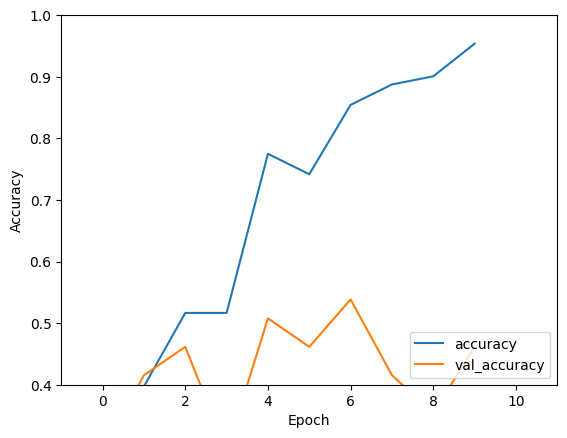

In [29]:
#Gráfica con la diferencia de valores de exactitud del entrenamiento y la validación.

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

In [30]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

3/3 - 2s - loss: 2.0624 - accuracy: 0.4615 - 2s/epoch - 550ms/step

Test accuracy: 0.4615384638309479


In [31]:
predictions = model.predict(X_test)

3/3 [==============================] - 2s 371ms/step


In [32]:
predictions[0]

array([ 0.00195922,  0.5281322 , -0.14640069], dtype=float32)

In [33]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(etiquetas[predicted_label],
                                100*np.max(predictions_array),
                                etiquetas[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(3))
  plt.yticks([])
  thisplot = plt.bar(range(3), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



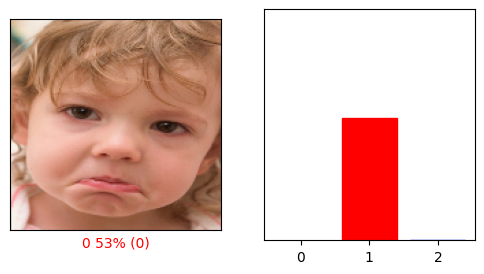

In [34]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()